# Examples using R interface to _GroenMonitor_

## Load functions

In [6]:
source("../R/gm_url.R")
source("../R/gm_get.R")

## Examples

### NDVI

[1] "https://data.groenmonitor.nl/geoserver/wcs?service=WCS&version=2.0.1&request=GetCoverage&coverageId=groenmonitor__ndvi_20251225&subset=E(684613,685907)&subset=N(5763913,5764822)&format=image/tiff"


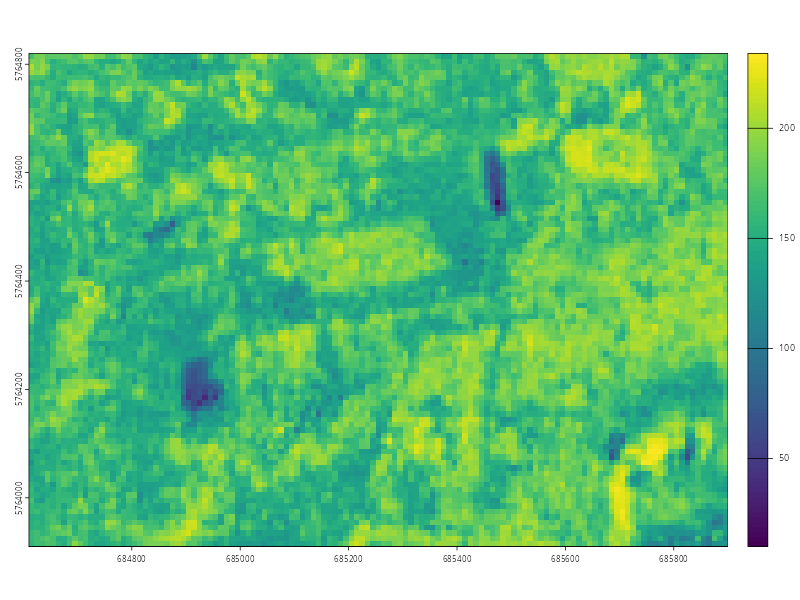

In [ ]:
# Load packages
library(terra)

# Set environmental variables
conda_env <- "/home/bruno/.miniconda3/envs/base_r/"
Sys.setenv(
  LD_LIBRARY_PATH = paste0(conda_env, "lib/R/lib"),
  PROJ_LIB = paste0(conda_env, "share/proj"),
  GDAL_DATA = paste0(conda_env, "share/gdal"),
  GDAL_DRIVER_PATH = paste0(conda_env, "lib/gdalplugins")
)

# Generate URL
myurl <- gm_url(option = "NDVI",
                params = c(date = "20251225",
                           xmin = 684613,
                           xmax = 685907,
                           ymin = 5763913,
                           ymax = 5764822,
                           format = "tiff"))

print(myurl)

# "https://data.groenmonitor.nl/geoserver/wcs?service=WCS&version=2.0.1&request=GetCoverage&coverageId=groenmonitor__ndvi_20251225&subset=E(684613,685907)&subset=N(5763913,5764822)&format=image/tiff"

# Download file
myfile <- "./ndvi_20251225.tif"
gm_get(url = myurl, out_path = myfile)

# Read file
ndvi <- rast(myfile)

# Plot
plot(ndvi)